Initial Setup

In [1]:
#import required packages
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#establish db connection
dbConn = pymysql.connect(
    host='127.0.0.1',
    user='root',
    password='81169',
    database='minicapstone'
)
if dbConn: print('Connection Established:', dbConn)
else: print('Connection Error')

Connection Established: <pymysql.connections.Connection object at 0x00000167C88D90D0>


# Spatial Analysis:


Where are the geographical hotspots for reported crimes?

C:\Users\debar\AppData\Local\Temp\ipykernel_5168\89270255.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crimeData = pd.read_sql(query, dbConn)


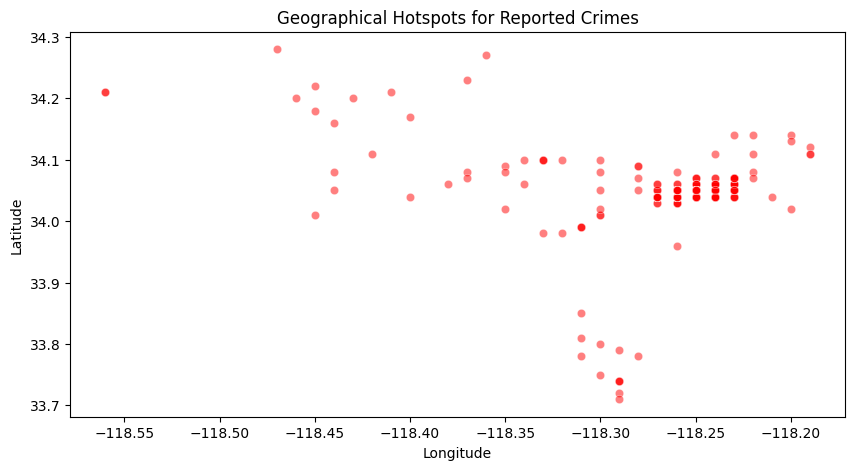

In [3]:
#Fetching
query = 'select lat, lon from crime_data'
crimeData = pd.read_sql(query, dbConn)

#Cleaning
crimeData.dropna(inplace=True)

#Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(data=crimeData, x='lon', y='lat', color='red', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Hotspots for Reported Crimes')
plt.show()

# Victim Demographics:

What is the distribution of victim ages in reported crimes?

C:\Users\debar\AppData\Local\Temp\ipykernel_5168\2806373651.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crimeData = pd.read_sql_query(query, dbConn)


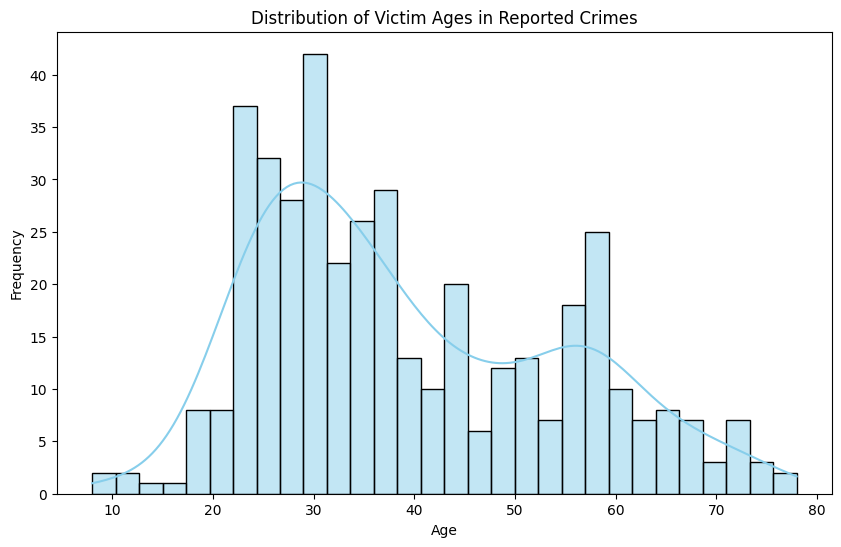

In [8]:
#Fetching
query = "select Vict_Age, Vict_Sex from crime_data"
crimeData = pd.read_sql_query(query, dbConn)

#Cleaning
crimeData.dropna(inplace=True)
crimeData = crimeData[crimeData['Vict_Age'] != 0]

#Visualization
plt.figure(figsize=(10, 6))
sns.histplot(crimeData['Vict_Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Victim Ages in Reported Crimes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Is there a significant difference in crime rates between male and female victims?

C:\Users\debar\AppData\Local\Temp\ipykernel_5168\3020314870.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crimeData = pd.read_sql_query(query, dbConn)


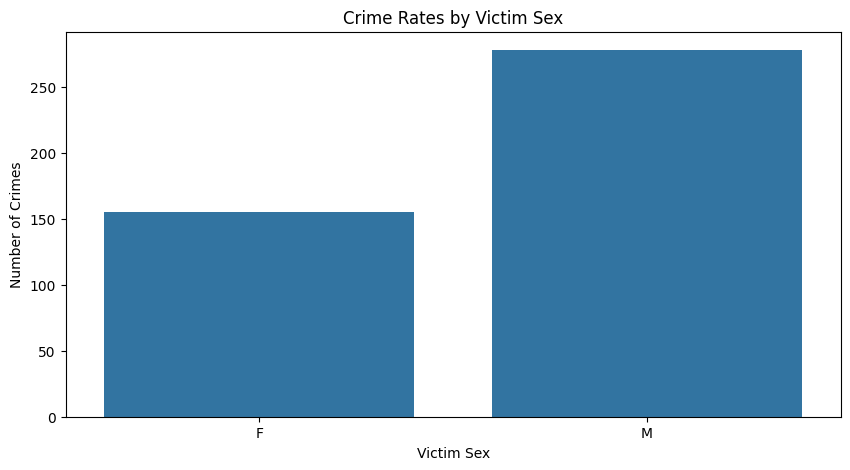

In [5]:
#Fetching
query = "select Vict_Sex from crime_data"
crimeData = pd.read_sql_query(query, dbConn)

#Cleaning
crimeData.dropna(inplace=True)
crimeData = crimeData[crimeData['Vict_Sex'].str.strip().isin(['M', 'F'])]

#Visualization
plt.figure(figsize=(10, 5))
sns.countplot(data=crimeData, x='Vict_Sex')
plt.title('Crime Rates by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Number of Crimes')
plt.show()

# Location Analysis:

Where do most crimes occur based on the "Location" column?

C:\Users\debar\AppData\Local\Temp\ipykernel_5168\3925355272.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crimeData = pd.read_sql_query(query, dbConn)


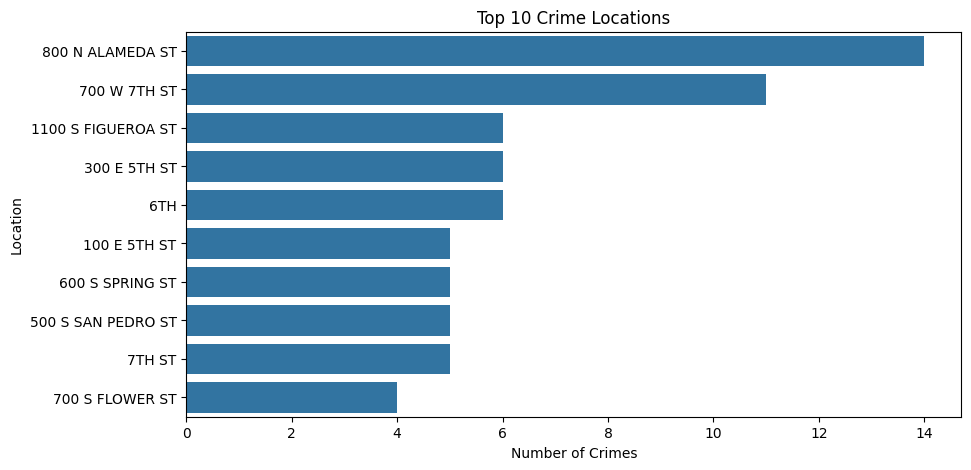

In [10]:
#Fetching
query = "select location from crime_data"
crimeData = pd.read_sql_query(query, dbConn)

#Cleaning
crimeData.dropna(inplace=True)

#Visualization
plt.figure(figsize=(10, 5))
sns.countplot(data=crimeData, y='location', order=crimeData['location'].value_counts().index[:10])
plt.title('Top 10 Crime Locations')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
plt.show()

# Crime Code Analysis:

What is the distribution of reported crimes based on Crime Code?

C:\Users\debar\AppData\Local\Temp\ipykernel_5168\436902601.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crimeData = pd.read_sql_query(query, dbConn)


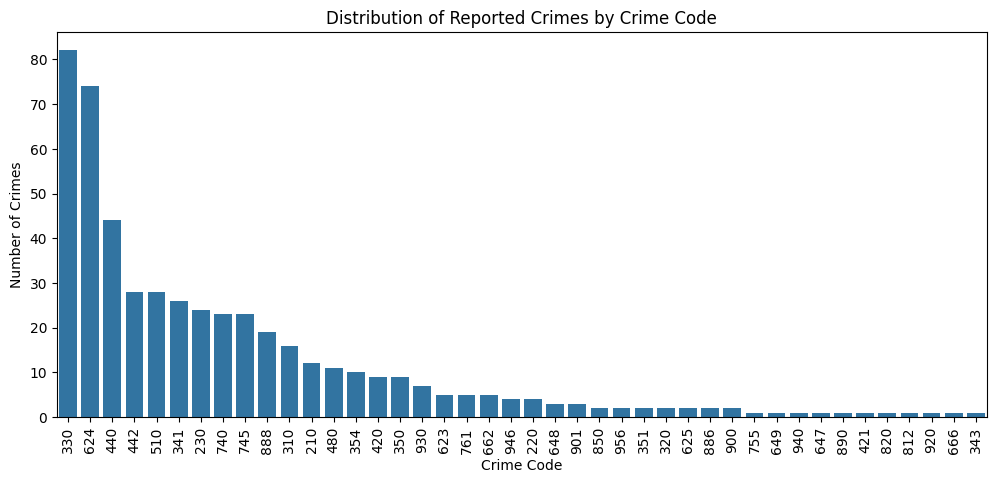

In [7]:
#Fetching
query = "select Crm_Cd from crime_data"
crimeData = pd.read_sql_query(query, dbConn)

#Cleaning
crimeData.dropna(inplace=True)

#Visualization
plt.figure(figsize=(12, 5))
sns.countplot(data=crimeData, x='Crm_Cd', order=crimeData['Crm_Cd'].value_counts().index)
plt.title('Distribution of Reported Crimes by Crime Code')
plt.xlabel('Crime Code')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()